# BaseLine—XGB


## 1.包加载

In [1]:
import numpy as np
import pandas as pd
import csv

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

#visualizations
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

#algorithms
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#score metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## 2.读取数据

In [2]:
train = pd.read_csv('./train/train.csv')
pd.set_option('max_columns', 35)
train.head(5)

,年龄,性别,区域,体重,身高,体重指数,肥胖腰围,腰围,最高血压,最低血压,好胆固醇,坏胆固醇,总胆固醇,血脂异常,周边血管疾病,体育活动,教育,未婚,收入,护理来源,视力不佳,饮酒,高血压,家庭高血压,糖尿病,家族糖尿病,肝炎,家族肝炎,慢性疲劳,急性肝衰竭,ID
0,58,F,east,75.6,174.9,24.71,0.0,94.8,100.0,52.0,35.0,95.0,130.0,0,0,1.0,0.0,0.0,0.0,Private Hospital,0.0,0,1.0,1,0,1,1.0,0.0,1.0,0.0,4379
1,85,F,east,66.3,166.1,24.03,0.0,89.6,134.0,84.0,59.0,153.0,212.0,0,0,2.0,0.0,0.0,0.0,Private Hospital,0.0,1,0.0,0,0,0,0.0,0.0,0.0,NaN,7623
2,32,F,east,109.9,173.2,36.64,1.0,111.7,124.0,84.0,39.0,133.0,172.0,0,0,2.0,1.0,0.0,1.0,Private Hospital,0.0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,1764
3,22,M,east,58.7,171.3,20.00,0.0,78.0,104.0,56.0,48.0,98.0,146.0,0,0,2.0,1.0,1.0,0.0,Never Counsulted,0.0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,5450
4,44,F,west,79.7,172.1,26.91,0.0,93.8,114.0,60.0,34.0,195.0,229.0,0,0,2.0,0.0,0.0,0.0,Private Hospital,0.0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,5196


In [3]:
train.shape

(6000, 31)

## 3.数据总样

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   年龄      6000 non-null   int64  
 1   性别      6000 non-null   object 
 2   区域      6000 non-null   object 
 3   体重      5860 non-null   float64
 4   身高      5864 non-null   float64
 5   体重指数    5791 non-null   float64
 6   肥胖腰围    5791 non-null   float64
 7   腰围      5776 non-null   float64
 8   最高血压    5781 non-null   float64
 9   最低血压    5727 non-null   float64
 10  好胆固醇    5994 non-null   float64
 11  坏胆固醇    5993 non-null   float64
 12  总胆固醇    5993 non-null   float64
 13  血脂异常    6000 non-null   int64  
 14  周边血管疾病  6000 non-null   int64  
 15  体育活动    5992 non-null   float64
 16  教育      5986 non-null   float64
 17  未婚      5692 non-null   float64
 18  收入      5237 non-null   float64
 19  护理来源    5999 non-null   object 
 20  视力不佳    5598 non-null   float64
 21  饮酒      6000 non-null   int64  
 22  

# 4.查找缺失值

In [5]:
total_missingvalues = train.isnull().sum()
total_missingvalues

年龄           0
性别           0
区域           0
体重         140
身高         136
体重指数       209
肥胖腰围       209
腰围         224
最高血压       219
最低血压       273
好胆固醇         6
坏胆固醇         7
总胆固醇         7
血脂异常         0
周边血管疾病       0
体育活动         8
教育          14
未婚         308
收入         763
护理来源         1
视力不佳       402
饮酒           0
高血压         49
家庭高血压        0
糖尿病          0
家族糖尿病        0
肝炎          16
家族肝炎         5
慢性疲劳        26
急性肝衰竭     1881
ID           0
dtype: int64

## 5.处理缺失值

In [6]:
train = train.drop(labels='护理来源', axis=1)
train = train.drop(labels='ID', axis=1)
train = train.drop(labels='区域', axis=1)
train = train.drop(labels='性别', axis=1)
train.head(5)

,年龄,体重,身高,体重指数,肥胖腰围,腰围,最高血压,最低血压,好胆固醇,坏胆固醇,总胆固醇,血脂异常,周边血管疾病,体育活动,教育,未婚,收入,视力不佳,饮酒,高血压,家庭高血压,糖尿病,家族糖尿病,肝炎,家族肝炎,慢性疲劳,急性肝衰竭
0,58,75.6,174.9,24.71,0.0,94.8,100.0,52.0,35.0,95.0,130.0,0,0,1.0,0.0,0.0,0.0,0.0,0,1.0,1,0,1,1.0,0.0,1.0,0.0
1,85,66.3,166.1,24.03,0.0,89.6,134.0,84.0,59.0,153.0,212.0,0,0,2.0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0.0,0.0,0.0,NaN
2,32,109.9,173.2,36.64,1.0,111.7,124.0,84.0,39.0,133.0,172.0,0,0,2.0,1.0,0.0,1.0,0.0,0,0.0,0,0,0,0.0,0.0,0.0,0.0
3,22,58.7,171.3,20.00,0.0,78.0,104.0,56.0,48.0,98.0,146.0,0,0,2.0,1.0,1.0,0.0,0.0,0,0.0,0,0,0,0.0,0.0,0.0,0.0
4,44,79.7,172.1,26.91,0.0,93.8,114.0,60.0,34.0,195.0,229.0,0,0,2.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0.0,0.0,0.0,0.0


In [7]:
# 用前面的值来填充
train.fillna(method='ffill', inplace=True)
train.head(5)


,年龄,体重,身高,体重指数,肥胖腰围,腰围,最高血压,最低血压,好胆固醇,坏胆固醇,总胆固醇,血脂异常,周边血管疾病,体育活动,教育,未婚,收入,视力不佳,饮酒,高血压,家庭高血压,糖尿病,家族糖尿病,肝炎,家族肝炎,慢性疲劳,急性肝衰竭
0,58,75.6,174.9,24.71,0.0,94.8,100.0,52.0,35.0,95.0,130.0,0,0,1.0,0.0,0.0,0.0,0.0,0,1.0,1,0,1,1.0,0.0,1.0,0.0
1,85,66.3,166.1,24.03,0.0,89.6,134.0,84.0,59.0,153.0,212.0,0,0,2.0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0.0,0.0,0.0,0.0
2,32,109.9,173.2,36.64,1.0,111.7,124.0,84.0,39.0,133.0,172.0,0,0,2.0,1.0,0.0,1.0,0.0,0,0.0,0,0,0,0.0,0.0,0.0,0.0
3,22,58.7,171.3,20.00,0.0,78.0,104.0,56.0,48.0,98.0,146.0,0,0,2.0,1.0,1.0,0.0,0.0,0,0.0,0,0,0,0.0,0.0,0.0,0.0
4,44,79.7,172.1,26.91,0.0,93.8,114.0,60.0,34.0,195.0,229.0,0,0,2.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0.0,0.0,0.0,0.0


## 分割数据集

In [8]:
y = train.iloc[:, 23]
print(y)

0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
5995    0.0
5996    0.0
5997    0.0
5998    1.0
5999    0.0
Name: 肝炎, Length: 6000, dtype: float64


In [9]:
X = train.drop(labels='肝炎', axis=1)
X.shape
X.head(5)

,年龄,体重,身高,体重指数,肥胖腰围,腰围,最高血压,最低血压,好胆固醇,坏胆固醇,总胆固醇,血脂异常,周边血管疾病,体育活动,教育,未婚,收入,视力不佳,饮酒,高血压,家庭高血压,糖尿病,家族糖尿病,家族肝炎,慢性疲劳,急性肝衰竭
0,58,75.6,174.9,24.71,0.0,94.8,100.0,52.0,35.0,95.0,130.0,0,0,1.0,0.0,0.0,0.0,0.0,0,1.0,1,0,1,0.0,1.0,0.0
1,85,66.3,166.1,24.03,0.0,89.6,134.0,84.0,59.0,153.0,212.0,0,0,2.0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0.0,0.0,0.0
2,32,109.9,173.2,36.64,1.0,111.7,124.0,84.0,39.0,133.0,172.0,0,0,2.0,1.0,0.0,1.0,0.0,0,0.0,0,0,0,0.0,0.0,0.0
3,22,58.7,171.3,20.00,0.0,78.0,104.0,56.0,48.0,98.0,146.0,0,0,2.0,1.0,1.0,0.0,0.0,0,0.0,0,0,0,0.0,0.0,0.0
4,44,79.7,172.1,26.91,0.0,93.8,114.0,60.0,34.0,195.0,229.0,0,0,2.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0.0,0.0,0.0


In [10]:
total_missingvalues = train.isnull().sum()
total_missingvalues

年龄        0
体重        0
身高        0
体重指数      0
肥胖腰围      0
腰围        0
最高血压      0
最低血压      0
好胆固醇      0
坏胆固醇      0
总胆固醇      0
血脂异常      0
周边血管疾病    0
体育活动      0
教育        0
未婚        0
收入        0
视力不佳      0
饮酒        0
高血压       0
家庭高血压     0
糖尿病       0
家族糖尿病     0
肝炎        0
家族肝炎      0
慢性疲劳      0
急性肝衰竭     0
dtype: int64

## 6.计算相关矩阵

<AxesSubplot:>

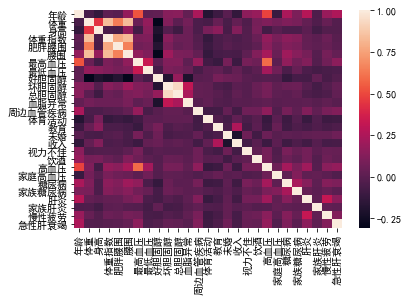

In [11]:
train_corr = train.corr()

sns.heatmap(train_corr,
            xticklabels=train_corr.columns,
            yticklabels=train_corr.columns)

In [12]:
train_corr.corr()


,年龄,体重,身高,体重指数,肥胖腰围,腰围,最高血压,最低血压,好胆固醇,坏胆固醇,总胆固醇,血脂异常,周边血管疾病,体育活动,教育,未婚,收入,视力不佳,饮酒,高血压,家庭高血压,糖尿病,家族糖尿病,肝炎,家族肝炎,慢性疲劳,急性肝衰竭
年龄,1.000000,-0.202977,-0.384202,-0.069330,-0.087753,0.048663,0.775691,-0.017003,0.012363,0.110328,0.116539,-0.053483,0.459038,-0.413864,-0.388335,0.032520,-0.407634,0.263435,0.236982,0.761775,-0.295256,0.423625,0.105755,0.479036,-0.133337,0.340023,0.457791
体重,-0.202977,1.000000,0.461506,0.931158,0.882071,0.947533,-0.061906,0.241681,-0.639705,0.106826,-0.102592,0.104307,-0.220447,-0.181421,-0.053804,-0.207569,-0.036193,-0.189237,0.047018,0.050134,0.091353,0.143673,0.125188,-0.078612,-0.145885,-0.049391,-0.184212
身高,-0.384202,0.461506,1.000000,0.107250,0.053797,0.231926,-0.297149,0.212687,-0.390019,-0.100001,-0.230859,0.064702,-0.238549,0.175386,0.276461,-0.217565,0.260794,-0.169828,0.099464,-0.291454,-0.011915,-0.186415,-0.145997,-0.137625,-0.186032,-0.154273,-0.200582
体重指数,-0.069330,0.931158,0.107250,1.000000,0.969487,0.965949,0.054556,0.184983,-0.555885,0.152363,-0.028468,0.083621,-0.148133,-0.275375,-0.178607,-0.139730,-0.151458,-0.139932,0.011129,0.177502,0.109330,0.237286,0.198308,-0.030863,-0.083759,0.006601,-0.126154
肥胖腰围,-0.087753,0.882071,0.053797,0.969487,1.000000,0.916624,0.030084,0.158329,-0.513509,0.124107,-0.043260,0.072722,-0.142014,-0.268364,-0.179143,-0.118447,-0.144783,-0.140788,-0.019457,0.156622,0.094551,0.214888,0.176793,-0.032350,-0.066016,0.000421,-0.118179
腰围,0.048663,0.947533,0.231926,0.965949,0.916624,1.000000,0.125880,0.195577,-0.633229,0.205139,-0.000245,0.123183,-0.094790,-0.297433,-0.216850,-0.185116,-0.187025,-0.114532,0.094345,0.244708,0.037932,0.292799,0.193391,0.034871,-0.137874,0.043948,-0.077028
最高血压,0.775691,-0.061906,-0.297149,0.054556,0.030084,0.125880,1.000000,0.406917,-0.037111,0.105263,0.095022,-0.068281,0.325943,-0.312380,-0.388467,0.098520,-0.376219,0.147435,0.057383,0.865112,-0.131503,0.306496,0.081157,0.250177,-0.147947,0.130096,0.294392
最低血压,-0.017003,0.241681,0.212687,0.184983,0.158329,0.195577,0.406917,1.000000,-0.187937,0.139125,0.079675,0.062160,-0.174656,-0.019936,-0.018369,-0.134212,0.012059,-0.153227,-0.059120,0.287977,0.082392,-0.128236,0.001994,-0.185433,-0.221969,-0.212177,-0.174155
好胆固醇,0.012363,-0.639705,-0.390019,-0.555885,-0.513509,-0.633229,-0.037111,-0.187937,1.000000,-0.219862,0.106486,-0.373549,0.016696,0.070306,0.169169,0.141197,0.104804,0.019954,-0.088017,-0.116817,-0.079455,-0.289002,-0.193188,-0.142898,0.073292,-0.134121,-0.018489
坏胆固醇,0.110328,0.106826,-0.100001,0.152363,0.124107,0.205139,0.105263,0.139125,-0.219862,1.000000,0.946572,0.527051,-0.044430,-0.013405,-0.153226,-0.185691,-0.064076,-0.121812,-0.005619,0.058092,-0.052867,-0.008757,0.009270,-0.144881,-0.220236,-0.148513,-0.055240


## 7.分割数据集

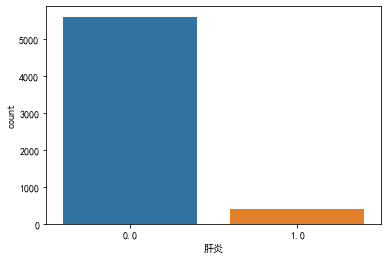

In [13]:
# 绘制计数直方图
sns.countplot(y)
plt.show()

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(X)
X_scaled = scaler.transform(X)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y)


In [16]:
xgb = XGBClassifier(random_state=10)
xgb.fit(X_train,y_train)
pred = xgb.predict(X_test)

In [17]:

count = 0
for i in range( len(y_test) ):
    if pred[i] != y_test.iloc[i]:
        count = count + 1

In [18]:
error = count/len(pred)
print( "Error for XGBoost= %f " % (error*100) + '%' )
accuracy = (1-error)
print( "Accuracy for XGBoost = %f " % (accuracy*100) + '%' )

Error for XGBoost= 6.266667 %
Accuracy for XGBoost = 93.733333 %


In [19]:

test = pd.read_csv('./test/test.csv')
pd.set_option('max_columns', 35)
test.head(5)

,年龄,性别,区域,体重,身高,体重指数,肥胖腰围,腰围,最高血压,最低血压,好胆固醇,坏胆固醇,总胆固醇,血脂异常,周边血管疾病,体育活动,教育,未婚,收入,护理来源,视力不佳,饮酒,高血压,家庭高血压,糖尿病,家族糖尿病,家族肝炎,慢性疲劳,急性肝衰竭,ID
0,30,M,east,71.8,163.3,26.92,0.0,94.6,101.0,45.0,83.0,139.0,222.0,0,0,3.0,1.0,0.0,NaN,Private Hospital,0.0,0,0.0,1,0.0,0,0.0,0.0,NaN,7964
1,63,M,south,71.8,154.8,29.96,0.0,93.2,115.0,60.0,81.0,56.0,137.0,0,0,2.0,0.0,0.0,0.0,Private Hospital,0.0,0,1.0,0,1.0,0,0.0,0.0,NaN,7320
2,20,M,south,104.8,165.0,38.49,1.0,118.8,115.0,60.0,40.0,124.0,164.0,0,0,3.0,0.0,1.0,0.0,Private Hospital,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,2114
3,64,M,east,63.4,155.1,26.36,0.0,80.5,92.0,61.0,74.0,88.0,162.0,0,0,2.0,1.0,0.0,1.0,Private Hospital,0.0,1,0.0,0,0.0,1,0.0,0.0,0.0,2443
4,78,F,east,98.9,174.8,32.37,1.0,114.5,128.0,65.0,62.0,110.0,172.0,0,0,1.0,1.0,0.0,0.0,Private Hospital,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,473


In [20]:
ID = test['ID']
print(ID)


0       7964
1       7320
2       2114
3       2443
4        473
        ... 
2780    8485
2781    5630
2782    7007
2783    1853
2784    8091
Name: ID, Length: 2785, dtype: int64


In [21]:
test = test.drop(labels='护理来源', axis=1)
test = test.drop(labels='ID', axis=1)
test = test.drop(labels='区域', axis=1)
test = test.drop(labels='性别', axis=1)
test.head(5)

,年龄,体重,身高,体重指数,肥胖腰围,腰围,最高血压,最低血压,好胆固醇,坏胆固醇,总胆固醇,血脂异常,周边血管疾病,体育活动,教育,未婚,收入,视力不佳,饮酒,高血压,家庭高血压,糖尿病,家族糖尿病,家族肝炎,慢性疲劳,急性肝衰竭
0,30,71.8,163.3,26.92,0.0,94.6,101.0,45.0,83.0,139.0,222.0,0,0,3.0,1.0,0.0,NaN,0.0,0,0.0,1,0.0,0,0.0,0.0,NaN
1,63,71.8,154.8,29.96,0.0,93.2,115.0,60.0,81.0,56.0,137.0,0,0,2.0,0.0,0.0,0.0,0.0,0,1.0,0,1.0,0,0.0,0.0,NaN
2,20,104.8,165.0,38.49,1.0,118.8,115.0,60.0,40.0,124.0,164.0,0,0,3.0,0.0,1.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0
3,64,63.4,155.1,26.36,0.0,80.5,92.0,61.0,74.0,88.0,162.0,0,0,2.0,1.0,0.0,1.0,0.0,1,0.0,0,0.0,1,0.0,0.0,0.0
4,78,98.9,174.8,32.37,1.0,114.5,128.0,65.0,62.0,110.0,172.0,0,0,1.0,1.0,0.0,0.0,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0


In [22]:
total_missingvalues = test.isnull().sum()
total_missingvalues

年龄          0
体重         54
身高         55
体重指数       81
肥胖腰围       81
腰围         90
最高血压       85
最低血压      103
好胆固醇       11
坏胆固醇       11
总胆固醇        9
血脂异常        0
周边血管疾病      0
体育活动        2
教育          6
未婚        144
收入        398
视力不佳      161
饮酒          0
高血压        31
家庭高血压       0
糖尿病         2
家族糖尿病       0
家族肝炎        1
慢性疲劳        9
急性肝衰竭     904
dtype: int64

In [23]:
test.fillna(0.0, inplace=True)
test.head(5)

,年龄,体重,身高,体重指数,肥胖腰围,腰围,最高血压,最低血压,好胆固醇,坏胆固醇,总胆固醇,血脂异常,周边血管疾病,体育活动,教育,未婚,收入,视力不佳,饮酒,高血压,家庭高血压,糖尿病,家族糖尿病,家族肝炎,慢性疲劳,急性肝衰竭
0,30,71.8,163.3,26.92,0.0,94.6,101.0,45.0,83.0,139.0,222.0,0,0,3.0,1.0,0.0,0.0,0.0,0,0.0,1,0.0,0,0.0,0.0,0.0
1,63,71.8,154.8,29.96,0.0,93.2,115.0,60.0,81.0,56.0,137.0,0,0,2.0,0.0,0.0,0.0,0.0,0,1.0,0,1.0,0,0.0,0.0,0.0
2,20,104.8,165.0,38.49,1.0,118.8,115.0,60.0,40.0,124.0,164.0,0,0,3.0,0.0,1.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0
3,64,63.4,155.1,26.36,0.0,80.5,92.0,61.0,74.0,88.0,162.0,0,0,2.0,1.0,0.0,1.0,0.0,1,0.0,0,0.0,1,0.0,0.0,0.0
4,78,98.9,174.8,32.37,1.0,114.5,128.0,65.0,62.0,110.0,172.0,0,0,1.0,1.0,0.0,0.0,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0


In [24]:
test.shape


(2785, 26)

In [25]:
# scaler.fit(test)
# X_scaled_test = scaler.transform(test)
y_real = xgb.predict(test)
print(y_real)

[0. 0. 0. ... 0. 0. 0.]


In [29]:
csvFile = open('./result/20201008-01-Result-XGBClassifier-1.csv', 'wt', encoding="UTF8", newline='')
myWriter = csv.writer(csvFile, delimiter=",")
myWriter.writerow(['ID', 'hepatitis'])
myWriter.writerows(zip(ID,y_real))

csvFile.close()